In [116]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
# dataset = pd.read_csv("./R03_25")
dataset = pd.read_csv("C:\\Users\\papir\\Downloads\\Telegram Desktop\\Task wise combined csv files\\Task wise combined csv files\\R03_25")


In [44]:
dataset.drop(columns={"Unnamed: 0"}, inplace=True)

In [45]:
dataset.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..,label
0,-57.0,-13.0,-15.0,-12.0,-13.0,-8.0,-40.0,-54.0,-12.0,-14.0,...,-38.0,-42.0,-68.0,-76.0,-103.0,-51.0,-56.0,-124.0,-28.0,0
1,-49.0,-11.0,-10.0,-12.0,-19.0,-24.0,-58.0,-51.0,-19.0,-23.0,...,-55.0,-63.0,-82.0,-87.0,-99.0,-59.0,-70.0,-149.0,-40.0,0
2,-55.0,-17.0,-16.0,-19.0,-24.0,-29.0,-66.0,-61.0,-30.0,-36.0,...,-63.0,-72.0,-91.0,-92.0,-91.0,-67.0,-77.0,-153.0,-37.0,0
3,-73.0,-42.0,-40.0,-37.0,-37.0,-40.0,-71.0,-78.0,-53.0,-53.0,...,-52.0,-66.0,-100.0,-105.0,-105.0,-67.0,-72.0,-148.0,-26.0,0
4,-87.0,-53.0,-52.0,-51.0,-45.0,-43.0,-71.0,-87.0,-65.0,-64.0,...,-82.0,-90.0,-117.0,-119.0,-118.0,-75.0,-82.0,-161.0,-35.0,0


In [70]:
parietal_dataset = pd.DataFrame()
parietal_region = ['Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Po4.', 'Po8.']
for column in dataset.columns:
    if column in parietal_region:
        parietal_dataset[column] = dataset[column] 
parietal_dataset.head()
    

,Cp5.,Cp3.,Cp1.,Cpz.,Cp2.,Cp4.,Cp6.,P7..,P5..,P3..,P1..,Pz..,P2..,P4..,P6..,P8..,Po7.,Po3.,Po4.,Po8.
0,-10.0,-14.0,-21.0,-25.0,-23.0,-34.0,-24.0,-7.0,-16.0,-43.0,-42.0,-44.0,-45.0,-44.0,-52.0,-48.0,-38.0,-42.0,-76.0,-103.0
1,-23.0,-30.0,-40.0,-41.0,-40.0,-53.0,-40.0,-31.0,-42.0,-67.0,-64.0,-66.0,-62.0,-62.0,-60.0,-55.0,-55.0,-63.0,-87.0,-99.0
2,-50.0,-47.0,-56.0,-59.0,-58.0,-70.0,-54.0,-43.0,-54.0,-74.0,-79.0,-79.0,-76.0,-70.0,-66.0,-54.0,-63.0,-72.0,-92.0,-91.0
3,-50.0,-60.0,-68.0,-69.0,-68.0,-82.0,-65.0,-13.0,-47.0,-81.0,-88.0,-88.0,-86.0,-83.0,-77.0,-65.0,-52.0,-66.0,-105.0,-105.0
4,-48.0,-71.0,-78.0,-78.0,-76.0,-91.0,-73.0,-43.0,-65.0,-97.0,-103.0,-100.0,-100.0,-99.0,-92.0,-75.0,-82.0,-90.0,-119.0,-118.0


In [71]:
data = parietal_dataset
data['label'] = dataset['label']

In [72]:
data.head()

,Cp5.,Cp3.,Cp1.,Cpz.,Cp2.,Cp4.,Cp6.,P7..,P5..,P3..,...,Pz..,P2..,P4..,P6..,P8..,Po7.,Po3.,Po4.,Po8.,label
0,-10.0,-14.0,-21.0,-25.0,-23.0,-34.0,-24.0,-7.0,-16.0,-43.0,...,-44.0,-45.0,-44.0,-52.0,-48.0,-38.0,-42.0,-76.0,-103.0,0
1,-23.0,-30.0,-40.0,-41.0,-40.0,-53.0,-40.0,-31.0,-42.0,-67.0,...,-66.0,-62.0,-62.0,-60.0,-55.0,-55.0,-63.0,-87.0,-99.0,0
2,-50.0,-47.0,-56.0,-59.0,-58.0,-70.0,-54.0,-43.0,-54.0,-74.0,...,-79.0,-76.0,-70.0,-66.0,-54.0,-63.0,-72.0,-92.0,-91.0,0
3,-50.0,-60.0,-68.0,-69.0,-68.0,-82.0,-65.0,-13.0,-47.0,-81.0,...,-88.0,-86.0,-83.0,-77.0,-65.0,-52.0,-66.0,-105.0,-105.0,0
4,-48.0,-71.0,-78.0,-78.0,-76.0,-91.0,-73.0,-43.0,-65.0,-97.0,...,-100.0,-100.0,-99.0,-92.0,-75.0,-82.0,-90.0,-119.0,-118.0,0


In [73]:
data.shape

(493200, 21)

In [74]:
len(data.columns)
print(data.columns)

Index(['Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'P7..', 'P5..',
       'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.',
       'Po4.', 'Po8.', 'label'],
      dtype='object')


In [75]:
from sklearn.model_selection import train_test_split
X = data.drop(columns={"label"})
Y = data['label']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = X_train_scaled.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_reshaped = X_test_scaled.reshape(X_test.shape[0],X_test.shape[1],1)

num_samples = X_train.shape[0]
num_features = X_train.shape[1]


In [76]:
train_accuracies = []
val_accuracies = []
losses = []

In [77]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(128, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(128, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  
model.add(Dense(3, activation='softmax'))


In [78]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [92]:
epochs = 100
for epoch in range(epochs):
    print(f"epoch {epoch+1}/100")
    history = model.fit(X_train_reshaped, Y_train, validation_split=0.1,epochs=1, callbacks=[early_stopping])  
    train_accuracies.append(history.history['accuracy'][0])
    val_accuracies.append(history.history['val_accuracy'][0])
    losses.append(history.history['loss'][0])


11097/11097 [==============================] - 10695s 964ms/step - loss: 0.4891 - accuracy: 0.7865 - val_loss: 0.5545 - val_accuracy: 0.7564
epoch 42/100
11097/11097 [==============================] - 81s 7ms/step - loss: 0.4892 - accuracy: 0.7860 - val_loss: 0.5568 - val_accuracy: 0.7572
epoch 43/100
11097/11097 [==============================] - 91s 8ms/step - loss: 0.4879 - accuracy: 0.7867 - val_loss: 0.5590 - val_accuracy: 0.7544
epoch 44/100
11097/11097 [==============================] - 91s 8ms/step - loss: 0.4874 - accuracy: 0.7864 - val_loss: 0.5527 - val_accuracy: 0.7547
epoch 45/100
11097/11097 [==============================] - 96s 9ms/step - loss: 0.4869 - accuracy: 0.7870 - val_loss: 0.5502 - val_accuracy: 0.7565
epoch 46/100
11097/11097 [==============================] - 91s 8ms/step - loss: 0.4857 - accuracy: 0.7890 - val_loss: 0.5495 - val_accuracy: 0.7548
epoch 47/100
11097/11097 [==============================] - 91s 8ms/step - loss: 0.4860 - accuracy: 0.7883 - val_l

epoch 96/100
11097/11097 [==============================] - 105s 9ms/step - loss: 0.4691 - accuracy: 0.7968 - val_loss: 0.5572 - val_accuracy: 0.7571
epoch 97/100
11097/11097 [==============================] - 136s 12ms/step - loss: 0.4674 - accuracy: 0.7980 - val_loss: 0.5547 - val_accuracy: 0.7603
epoch 98/100
11097/11097 [==============================] - 133s 12ms/step - loss: 0.4690 - accuracy: 0.7969 - val_loss: 0.5534 - val_accuracy: 0.7589
epoch 99/100
11097/11097 [==============================] - 135s 12ms/step - loss: 0.4675 - accuracy: 0.7971 - val_loss: 0.5502 - val_accuracy: 0.7575
epoch 100/100
11097/11097 [==============================] - 134s 12ms/step - loss: 0.4673 - accuracy: 0.7975 - val_loss: 0.5515 - val_accuracy: 0.7601


In [93]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, Y_test, verbose=0)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.5530
Test Accuracy: 0.7602


In [103]:
print(train_accuracies)
# print(losses)
print(len(train_accuracies))
# print(len(losses))

[0.5436463952064514, 0.6223134398460388, 0.6536873579025269, 0.6704909205436707, 0.6833631992340088, 0.690561056137085, 0.6980180740356445, 0.7038219571113586, 0.7086262106895447, 0.7118618488311768, 0.7156382203102112, 0.7196455001831055, 0.7222616672515869, 0.7248609066009521, 0.7267786264419556, 0.7296735644340515, 0.7312477231025696, 0.7346411347389221, 0.735511302947998, 0.7362856864929199, 0.7388032674789429, 0.7401859760284424, 0.7415883541107178, 0.7434808015823364, 0.7453365921974182, 0.7466207146644592, 0.7469586133956909, 0.7494423985481262, 0.7496789693832397, 0.7508729696273804, 0.7520641684532166, 0.753829836845398, 0.7547479271888733, 0.7554237842559814, 0.7562122941017151, 0.7559306621551514, 0.7576766014099121, 0.7588481307029724, 0.7587974071502686, 0.7602645754814148, 0.7615628242492676, 0.7617346048355103, 0.7625315189361572, 0.7633932828903198, 0.7636607885360718, 0.764598548412323, 0.7656179666519165, 0.765215277671814, 0.7660769820213318, 0.7674146294593811, 0.76

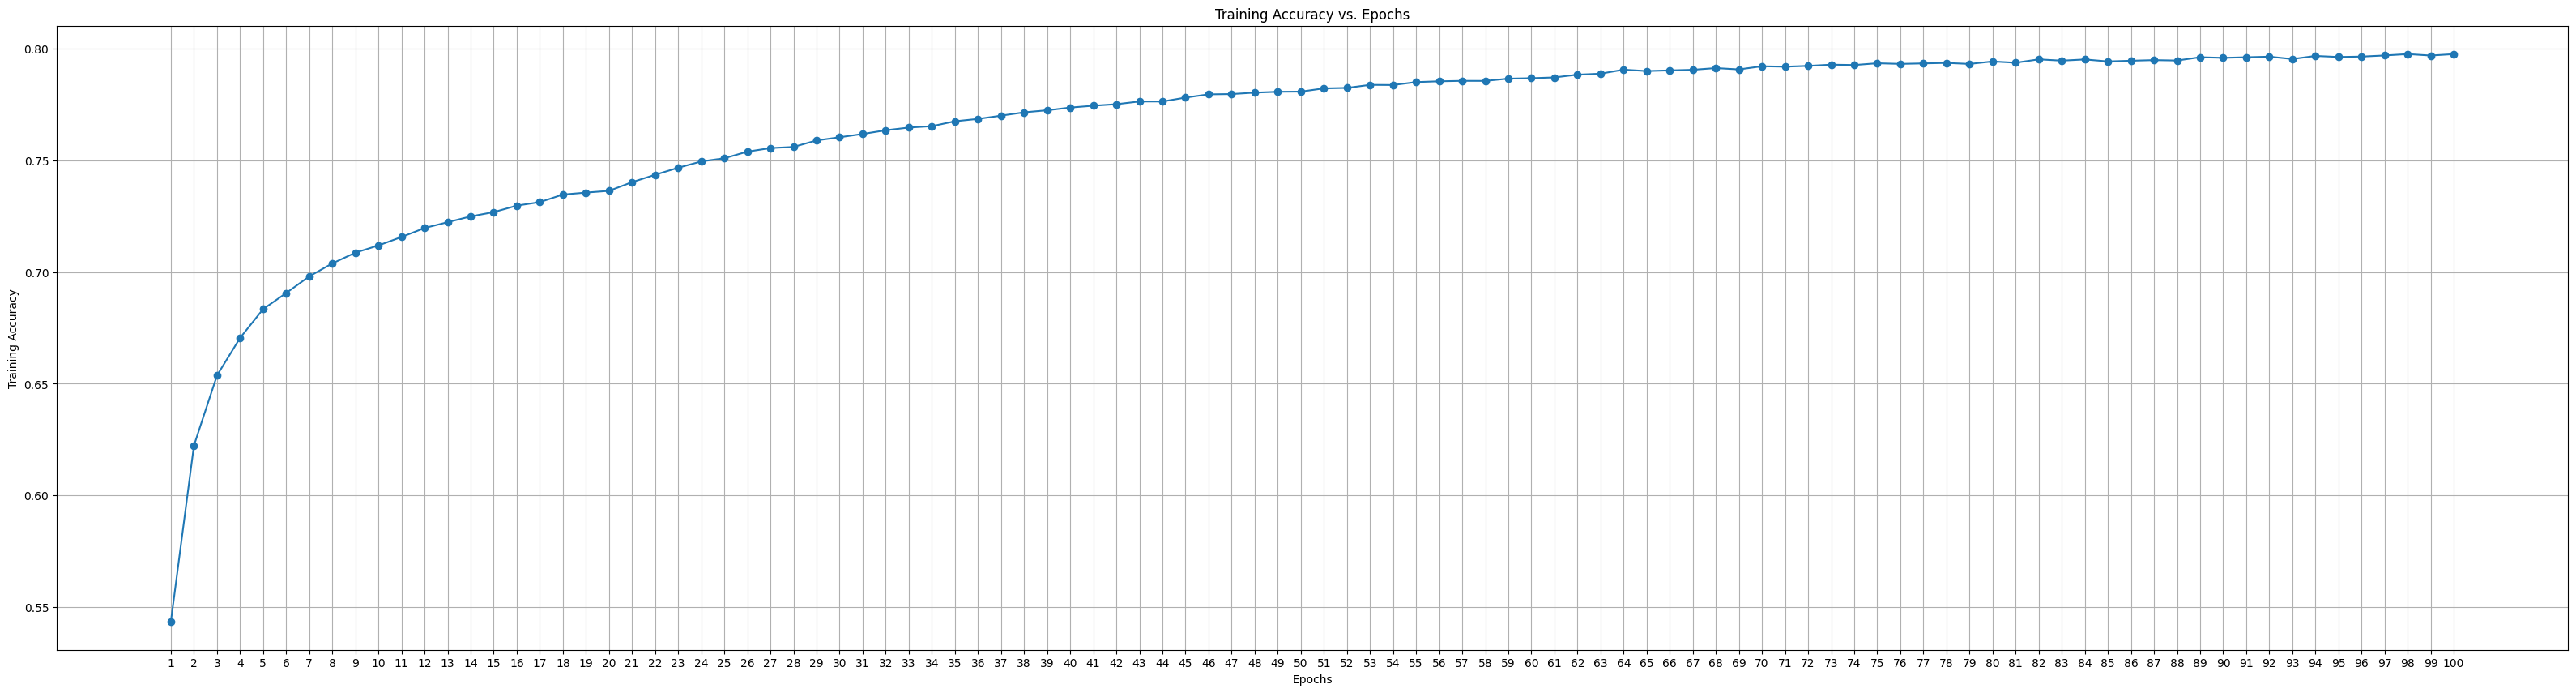

In [104]:
import matplotlib.pyplot as plt
epochs_list = [i for i in range(1,101)]
plt.figure(figsize=(40,10))
plt.plot(epochs_list, train_accuracies, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.grid(True)
plt.xticks(range(1, 101))

plt.show()

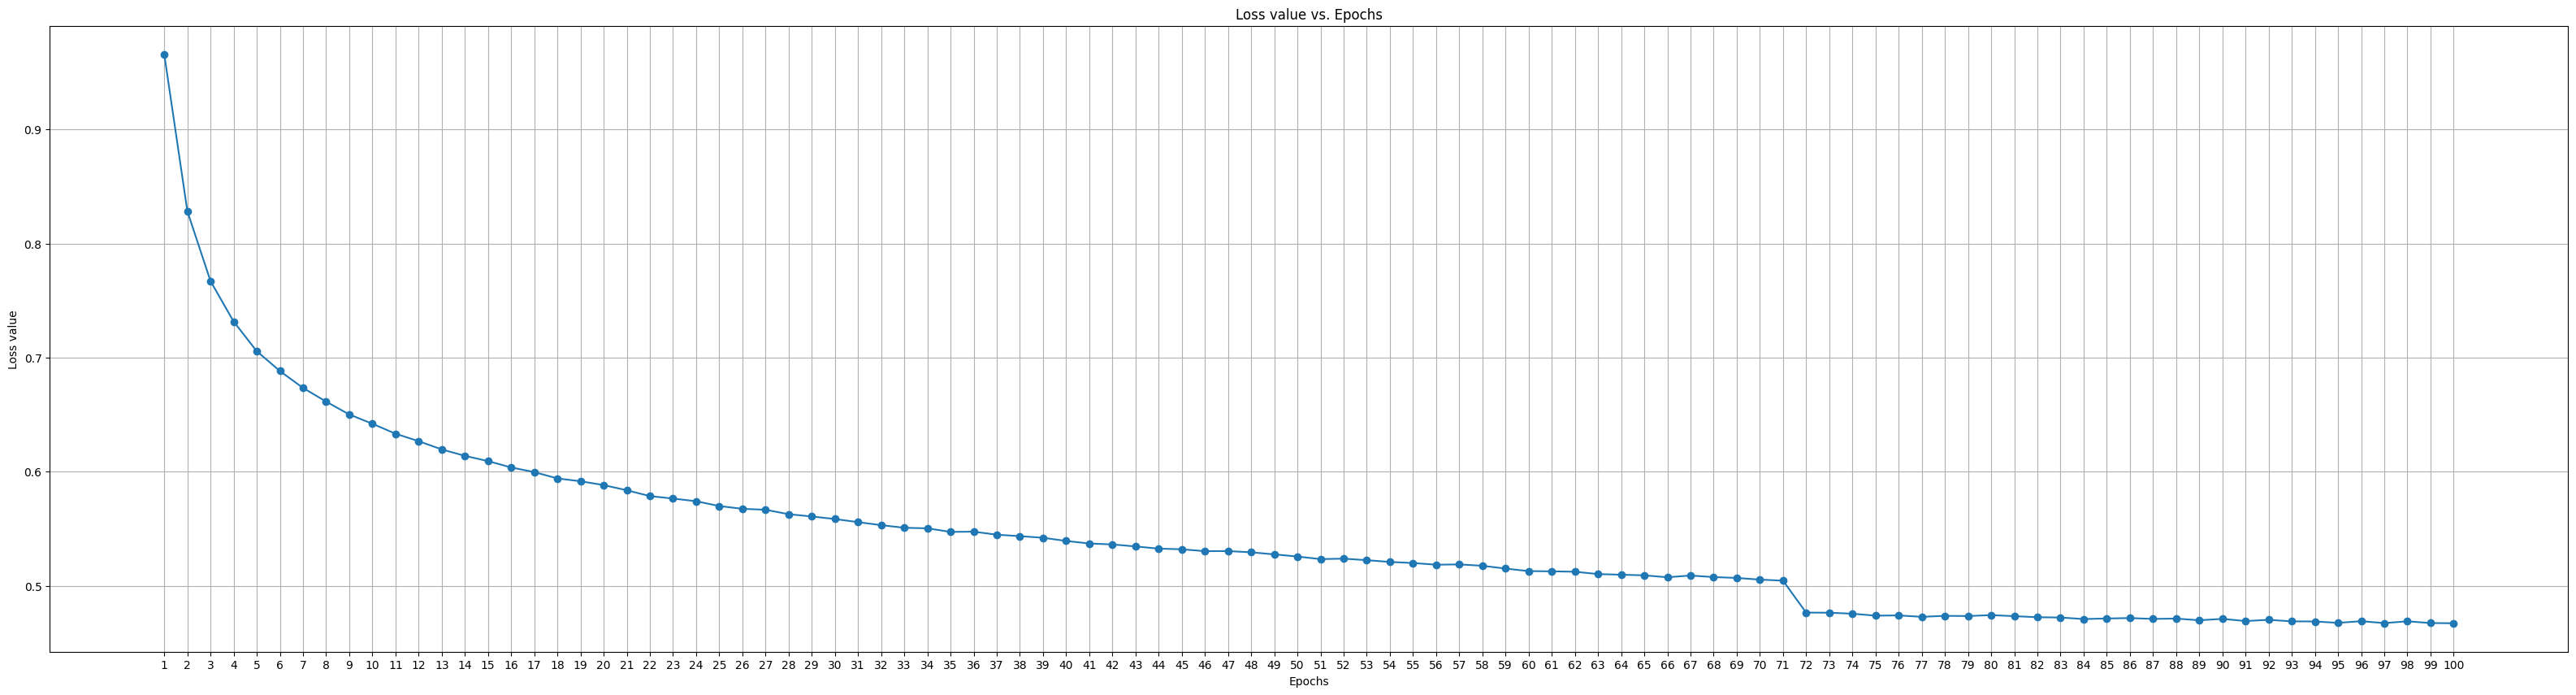

In [148]:


import matplotlib.pyplot as plt
epochs_list = [i for i in range(1,101)]
plt.figure(figsize=(40,10))
plt.plot(epochs_list, losses, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.title('Loss value vs. Epochs')
plt.grid(True)
plt.xticks(range(1, 101))

plt.show()

In [105]:
print(sum(train_accuracies))

76.52511394023895


In [106]:
print(max(train_accuracies))

0.7974734306335449


In [107]:
y_test_data = np.array(Y_test)

y_test_data.shape

(98640,)

In [137]:

test_pred = model.predict(X_test_reshaped)
predlabels = np.argmax(test_pred,axis=1)

3083/3083 [==============================] - 14s 4ms/step


In [114]:
from sklearn.metrics import accuracy_score

input_data = np.array(X_test_reshaped[2300]).reshape(1,X_test_reshaped[0].shape[0], X_test_reshaped[0].shape[1])

print(input_data.shape)
pred = model.predict(input_data)
y_pred_labels = np.argmax(pred, axis=1)

print("True Label:", Y_test.iloc[0])  
print("Predicted Label:", y_pred_labels[0])
print("Predicted Probabilities:", pred)



(1, 20, 1)
1/1 [==============================] - 0s 44ms/step
True Label: 0
Predicted Label: 0
Predicted Probabilities: [[0.86974674 0.05255932 0.07769394]]


## 

In [139]:
print(Y_test.shape)
print(test_pred.shape)
conf_matrix = confusion_matrix(Y_test,predlabels)
print("Confusion matrix:  ")
print(conf_matrix)

(98640,)
(98640, 3)
Confusion matrix:  
[[43610  2583  3283]
 [ 7125 15320  2212]
 [ 6931  1522 16054]]


C:\Users\papir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\papir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\papir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\papir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

In [143]:
class_report = classification_report(Y_test, predlabels)
print(class_report)

C:\Users\papir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\papir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\papir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\papir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

              precision    recall  f1-score   support

           0       0.76      0.88      0.81     49476
           1       0.79      0.62      0.70     24657
           2       0.74      0.66      0.70     24507

    accuracy                           0.76     98640
   macro avg       0.76      0.72      0.74     98640
weighted avg       0.76      0.76      0.76     98640

